In [5]:
#Load all the essential packages for the analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
from matplotlib.lines import Line2D


#Font settings
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath, amssymb}"

#Color schemes
COLORS = ["#42AED0", "#D06442"]
COLORS2 = ["#7FCA93","#7F91CA","#CA7FB6"]

# Data

For the figures in this notebook, create the following datafiles with the code in experiments and insert them into the correct folder. For details on the input files, consult the README file.

results/

&nbsp;&nbsp;&nbsp;&nbsp;cmcqrd/
- cmcqrd_with_bt.parquet 
- cmcqrd_with_labels.parquet (parse label results and add them to the cmcqrd dataframe as a column)
- all_bt_with_difficulty_cmcqrd_oss.parquet

&nbsp;&nbsp;&nbsp;&nbsp;omni/
- omni_with_bt.parquet
- omni_with_labels (parse label results and add them to the omni dataframe as a column)
- omni_with_performance.parquet (parse benchmark results and add them to the omni dataframe as a column)
- all_bt_with_difficulty_omni_oss.parquet
- omni_gemini_noise_alpha_0.01.parquet
- omni_gemini_noise_alpha_0.02.parquet
- omni_gemini_noise_alpha_0.05.parquet
- omni_gemini_noise_alpha_0.1.parquet

# Figure A4

The BT scores for Omni-Math converge for \#M=36, the BT scores for CMCQRD converge for \#M=66.

In [12]:
#-------------------------------------- Dataframes --------------------------------------

# CMCQRD
df_cmcqrd = pd.read_parquet("../results/cmcqrd/all_bt_with_difficulty_cmcqrd_oss.parquet")
columns = df_cmcqrd.columns.values[1:-3]
correlations = {"Pearson": {col: 0 for col in columns}, "Spearman": {col: 0 for col in columns}, "Kendall": {col: 0 for col in columns}}

for col in columns:
    correlations['Pearson'][col] = df_cmcqrd[col].corr(df_cmcqrd["bt_200"], method="pearson")
    correlations['Spearman'][col] = df_cmcqrd[col].corr(df_cmcqrd["bt_200"], method="spearman")
    correlations['Kendall'][col] = df_cmcqrd[col].corr(df_cmcqrd["bt_200"], method="kendall")

df_cmcqrd_corr = pd.DataFrame(correlations).reset_index().melt(id_vars="index", var_name="method", value_name="correlation").rename(columns={"index": "iteration"})
df_cmcqrd_corr["iteration"] = df_cmcqrd_corr["iteration"].str.replace("bt_", "").astype(int)

# Omni-Math
df_omni = pd.read_parquet("../results/omni/all_bt_with_difficulty_omni_oss.parquet")
columns = df_omni.columns.values[2:-1]
correlations = {"Pearson": {col: 0 for col in columns}, "Spearman": {col: 0 for col in columns}, "Kendall": {col: 0 for col in columns}}

for col in columns:
    correlations['Pearson'][col] = df_omni[col].corr(df_omni["bt_X=200"], method="pearson")
    correlations['Spearman'][col] = df_omni[col].corr(df_omni["bt_X=200"], method="spearman")
    correlations['Kendall'][col] = df_omni[col].corr(df_omni["bt_X=200"], method="kendall")

df_omni_corr = pd.DataFrame(correlations).reset_index().melt(id_vars="index", var_name="method", value_name="correlation").rename(columns={"index": "iteration"})
df_omni_corr["iteration"] = df_omni_corr["iteration"].str.replace("bt_X=", "").astype(int)

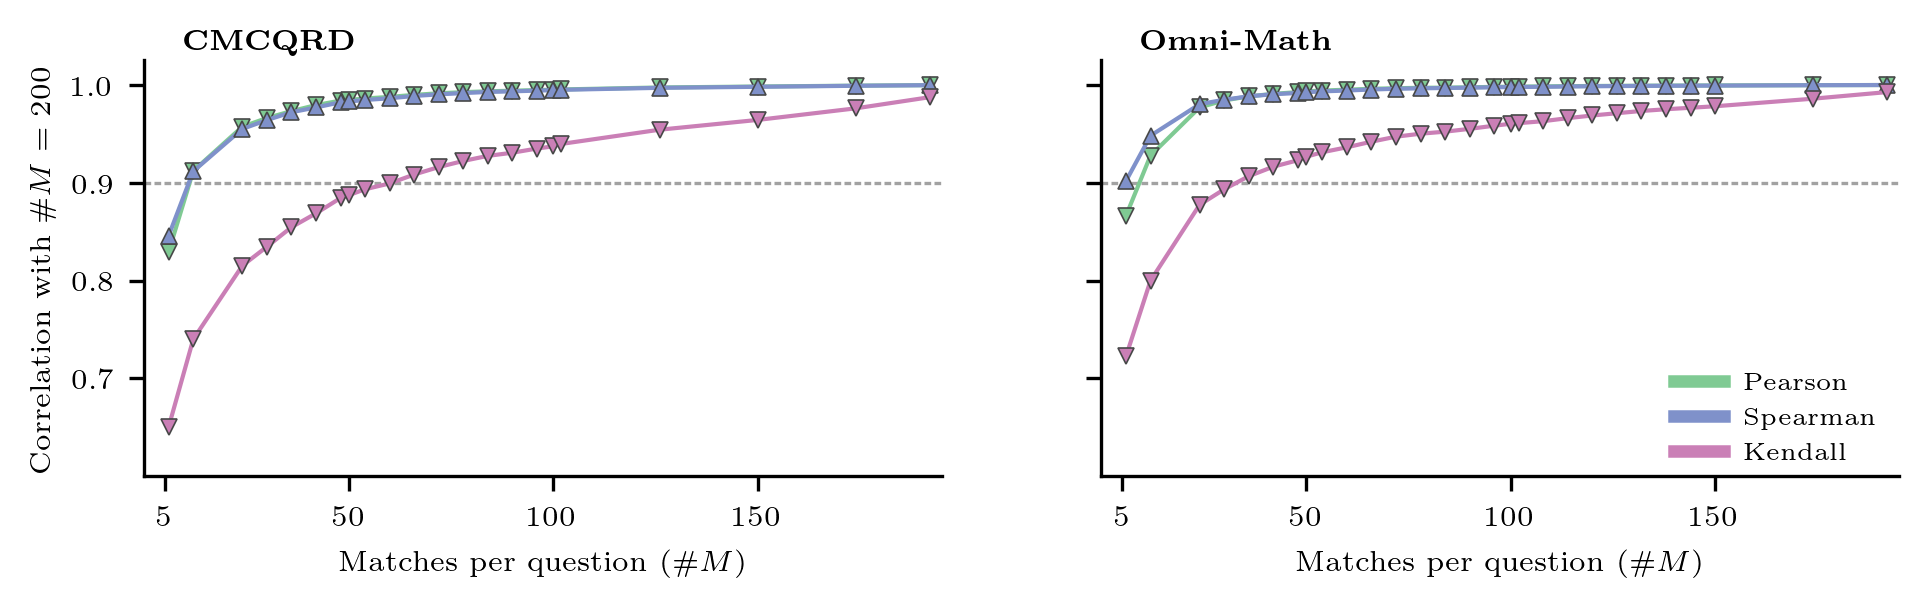

In [13]:
FigureA4, axA4 = plt.subplot_mosaic([["A", "B"]], figsize=(6.5,9/5), dpi=300, gridspec_kw={ "left":0.05, "right":0.95}, sharey=True)


# Panel A
marker_map = {
    "Pearson": "v",
    "Spearman": "^",
    "Kendall": "v",
}

sns.lineplot(data = df_cmcqrd_corr, x="iteration", y="correlation", hue = "method", style="method", ax=axA4["A"], palette=COLORS2, markers=marker_map, markersize=4, linewidth=1, markeredgewidth=0.4, dashes=False, zorder=2, markeredgecolor="#474848")
sns.lineplot(x=[0,195], y=[0.9,0.9], ax=axA4["A"], color="#464747", linestyle=(0,(2,1)), linewidth=0.8, zorder=1, alpha=0.5)
axA4["A"].get_legend().remove()
axA4["A"].set_xlim(0,195)
axA4["A"].set_ylim(0.60,1.025)
axA4["A"].set_xticks(ticks = [5,50,100,150], labels = [5,50,100,150], fontsize=7)
axA4["A"].set_yticks(ticks = [0.7,0.8, 0.9,1.0], labels = [0.7,0.8, 0.9,1.0], fontsize=7)
axA4["A"].set_xlabel(r"Matches per question ($\#M$)", fontsize=7)
axA4["A"].set_ylabel(r"Correlation with $\#M=200$", fontsize=7)
sns.despine(ax=axA4["A"], top=True, right=True)

axA4["A"].text(0.05, 1.075, r"\textbf{CMCQRD}", transform=axA4["A"].transAxes, fontsize=7, va='top', ha='left')


# Panel B
sns.lineplot(data = df_omni_corr, x="iteration", y="correlation", hue = "method", style="method", ax=axA4["B"], palette=COLORS2, markers=marker_map, markersize=4, linewidth=1, markeredgewidth=0.4, dashes=False, markeredgecolor="#474848", zorder=2)
sns.lineplot(x=[0,195], y=[0.9,0.9], ax=axA4["B"], color="#464747", linestyle=(0,(2,1)), linewidth=0.8, zorder=1, alpha=0.5)
axA4["B"].get_legend().remove()
axA4["B"].set_xlim(0,195)
axA4["B"].set_ylim(0.60,1.025)
axA4["B"].set_xticks(ticks = [5,50,100,150], labels = [5,50,100,150], fontsize=7)
axA4["B"].set_yticks(ticks = [0.7,0.8, 0.9,1.0], labels = [0.7,0.8, 0.9,1.0], fontsize=7)
axA4["B"].set_xlabel(r"Matches per question ($\#M$)", fontsize=7)
axA4["B"].set_ylabel(r"Correlation with $\#M=200$", fontsize=7)
sns.despine(ax=axA4["B"], top=True, right=True)

labels = ["Pearson", "Spearman", "Kendall"]
handles = [Line2D([0], [0], color=c, lw=3, label=f"{metric.capitalize()}") for c, metric in zip(COLORS2, labels)]
axA4["B"].legend(handles= handles, loc='lower right', bbox_to_anchor=(1, -0.025), frameon = False, fontsize=6, title="", title_fontsize=7)

axA4["B"].text(0.05, 1.075, r"\textbf{Omni-Math}", transform=axA4["B"].transAxes, fontsize=7, va='top', ha='left')

plt.savefig("../figures/FigureA4.pdf", bbox_inches='tight', dpi=300)
plt.show()

# Figure A5

All results in Section 5 continue to hold when we use Gemini 2.5 Pro to construct the LLM-based measures. The schematic explanation of how we added hallucinations and overview table (right corner) was added seperately in tex (as a tikz figure).

In [ ]:
# --------------------------------------- Gemini 2.5 Pro --------------------------------------


# CMCQRD
df_cmcqrd = pd.read_parquet("../results/cmcqrd/cmcqrd_with_bt.parquet")
bt_scores_cmcqrd = {
    "o3_BT": df_cmcqrd["o3_bt"].astype(float).to_numpy(),  # Add gemini scores later
    "gemini_BT": df_cmcqrd["gemini_bt"].astype(float).to_numpy(),
}
df_cmcqrd_labels = pd.read_parquet("../results/cmcqrd/cmcqrd_with_labels.parquet")
llm_labels_cmcqrd = df_cmcqrd_labels['gemini_label'].astype(float).to_numpy()   

df_llm_scores_cmcqrd = (
    pd.Series(bt_scores_cmcqrd)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)   
df_llm_scores_cmcqrd["labels"] = np.tile(llm_labels_cmcqrd, 2)


# Omni-Math
df_omni = pd.read_parquet("../results/omni/omni_with_bt.parquet")
df_omni_performance = pd.read_parquet("../results/omni/omni_with_performance.parquet")
df_omni_performance['gemini_score'] = df_omni_performance["gemini_score"].apply(lambda x: 1-x % 2) #turn it into measure of difficulty

llm_performance_omni = df_omni_performance["gemini_score"].astype(float).to_numpy()
center_of_mass_1 = np.mean(df_omni["gemini_bt"][df_omni_performance["gemini_score"] == 1])
center_of_mass_0 = np.mean(df_omni["gemini_bt"][df_omni_performance["gemini_score"] == 0])
#print(f"Center of mass for  gemini_score = 1: {center_of_mass_1}")
#print(f"Center of mass for  gemini_score = 0: {center_of_mass_0}")

bt_scores_omni = {
    "o3_BT": df_omni["o3_bt"].astype(float).to_numpy(),  # Add gemini scores later
    "gemini_BT": df_omni["gemini_bt"].astype(float).to_numpy(),
}

df_llm_scores_omni = (
    pd.Series(bt_scores_omni)
    .explode()
    .reset_index(name="value")
    .rename(columns={"index": "key"})
)
df_llm_scores_omni["performance"] = np.tile(llm_performance_omni, 2)


# Add labels as well
df_omni_labels = pd.read_parquet("../results/omni/omni_with_labels.parquet")
llm_labels_omni = df_omni_labels["gemini_label"].astype(float).to_numpy()
df_llm_scores_omni['labels'] = np.tile(llm_labels_omni, 2)

# Robustness with Gemini 2.5 Pro
df_alpha_001 = pd.read_parquet("../results/omni/omni_gemini_noise_alpha_0.01.parquet")

df_alpha_002 = pd.read_parquet("../results/omni/omni_gemini_noise_alpha_0.02.parquet")

df_alpha_005 = pd.read_parquet("../results/omni/omni_gemini_noise_alpha_0.05.parquet")

df_alpha_01 = pd.read_parquet("../results/omni/omni_gemini_noise_alpha_0.1.parquet")


frames = [
    (df_alpha_001, 0.01),
    (df_alpha_002, 0.02),
    (df_alpha_005, 0.05),
    (df_alpha_01,  0.10),
]
stacked = pd.concat(
    [df.assign(alpha=a) for df, a in frames],
    ignore_index=True
)[["it", "pearson", "kendall", "spearman", "type", "alpha"]]

long_df = stacked.melt(
    id_vars=["alpha", "it", "type"],
    value_vars=["pearson", "spearman", "kendall"],
    var_name="metric",
    value_name="correlation"
).reset_index(drop=True)
long_df["alpha_label"] = (long_df["alpha"] * 100).map(lambda x: f"{x:.0f}%")

# Final dataframes
df_long_performance_gemini = long_df[long_df["type"] == "performance"]
df_long_labels_gemini = long_df[long_df["type"] == "labels"]
df_long_bt_gemini = long_df[long_df["type"] == "bt"]

/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_20592/3199061326.py:266: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axA6b["B"].set_xticklabels([r"1\%", r"2\%", r"5\%", r"10\%"], fontsize=7)


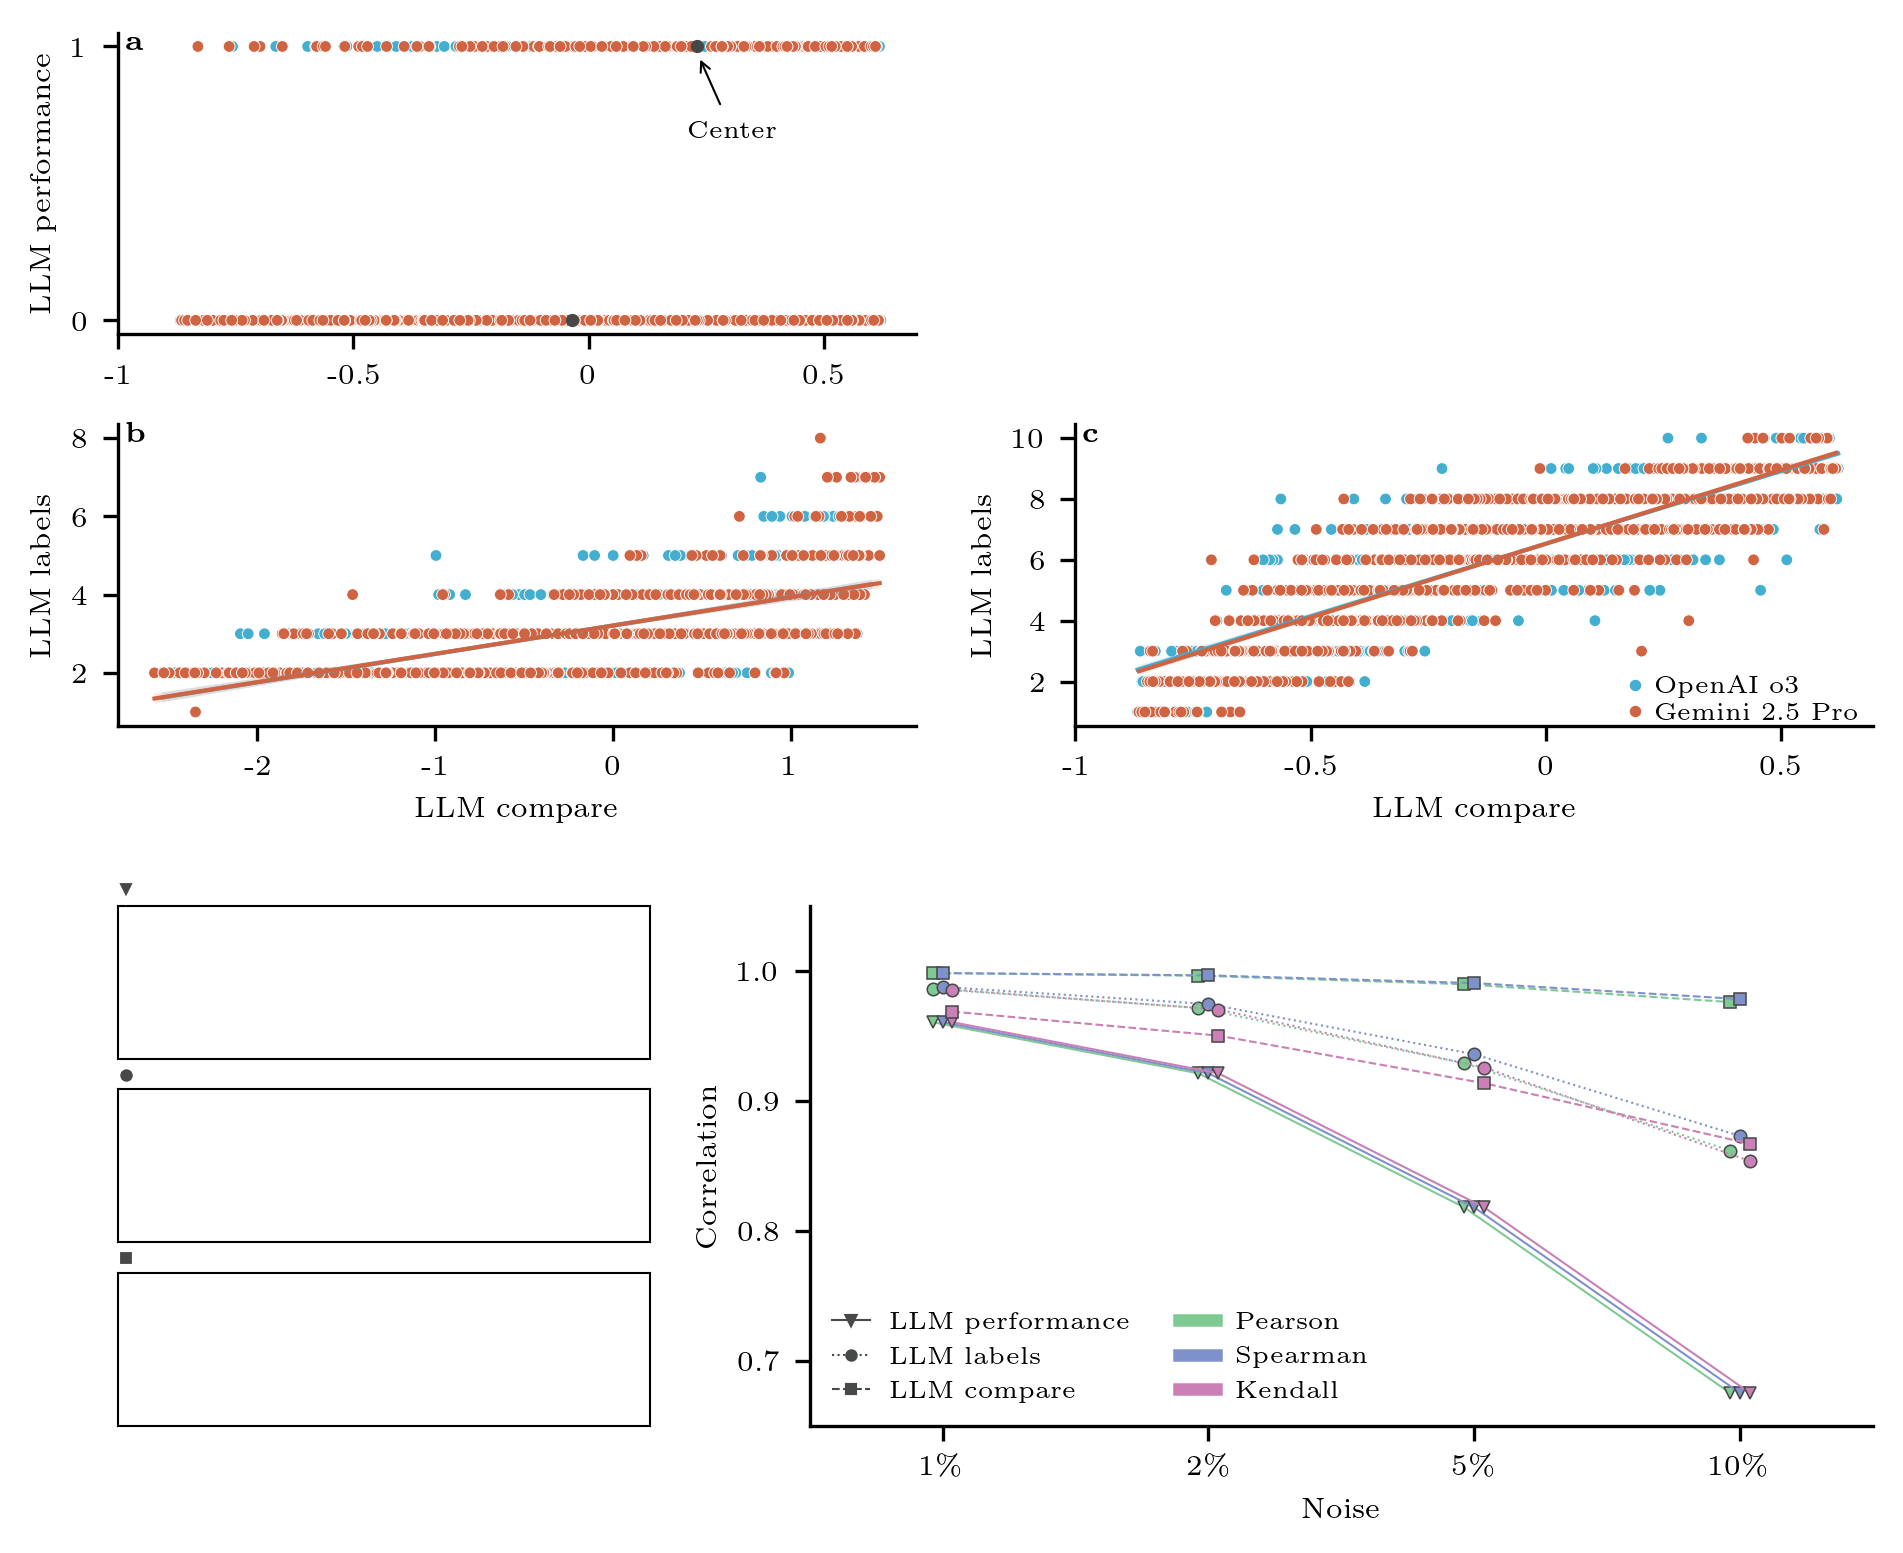

In [ ]:
FigureA6 = plt.figure(figsize=(6.5, 5.25), dpi=300)

subfig_top, subfig_bottom = FigureA6.subfigures(2, 1, height_ratios=[1.333, 1])

# --------------------------------------- Top subfigure --------------------------------------
axA6a = subfig_top.subplot_mosaic(
    [["A", "B"], ["C", "D"]],
    gridspec_kw={
        "width_ratios": [1, 1],
        "left": 0.05,
        "right": 0.95,
        "wspace": 0.2,
        "hspace": 0.3
    }
)

# Panel A
sns.scatterplot(
    data=df_llm_scores_omni,
    y="performance",
    x="value",
    hue="key",
    palette=COLORS,
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=axA6a["A"],
)

sns.scatterplot(x=[center_of_mass_0, center_of_mass_1], y=[0,1], color='#464747', s=30, marker='.', ax=axA6a["A"], label='Center of mass', edgecolor = "#464747")

axA6a["A"].set_xlabel("", fontsize=7)
axA6a["A"].set_ylabel(r"LLM performance", fontsize=7)
axA6a["A"].set_yticks(
    ticks=[0,1],
    labels=["0","1"],
    fontsize=7
)
axA6a["A"].set_xticks(
    ticks=[-1,-0.5,0,0.5],
    labels=["-1","-0.5","0","0.5"],
    fontsize=7
)
axA6a["A"].set_title("")
axA6a["A"].grid(False)
sns.despine(ax=axA6a["A"],left=False, bottom=False)

axA6a["A"].get_legend().set_visible(False)
axA6a["A"].annotate('Center', xy=(0.23, 0.98), xytext=(0.305, 0.65),
             arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.5),
             horizontalalignment='center', verticalalignment='bottom', fontsize=6)

# Panel C 
sns.scatterplot(
    data = df_llm_scores_cmcqrd,
    x = "value",
    y = "labels",
    hue = "key",
    palette = COLORS,
    s = 8,
    hue_order = [
        "o3_BT", "gemini_BT"
    ],
    ax = axA6a["C"],
)

sns.regplot(
    y=llm_labels_cmcqrd,
    x=bt_scores_cmcqrd["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=axA6a["C"],
)
sns.regplot(
    y=llm_labels_cmcqrd,
    x=bt_scores_cmcqrd["gemini_BT"],
    color=COLORS[1],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=axA6a["C"],
)

axA6a["C"].set_xlabel("LLM compare", fontsize=7)
axA6a["C"].set_ylabel(r"LLM labels", fontsize=7)
axA6a["C"].set_yticks(
    ticks=[2,4,6,8],
    labels=["2","4","6", "8"],
    fontsize=7
)
axA6a["C"].set_xticks(
     ticks=[-2,-1,0,1],
     labels=["-2","-1","0","1"],
     fontsize=7
 )
axA6a["C"].set_title("")
axA6a["C"].grid(False)
sns.despine(ax=axA6a["C"],left=False, bottom=False)

axA6a["C"].get_legend().set_visible(False)

#Panel B
axA6a["B"].set_xticks([])
axA6a["B"].set_yticks([])
axA6a["B"].grid(False)
sns.despine(ax=axA6a["B"], bottom=True, left=True, right=True, top=True)

#Panel D
sns.scatterplot(
    data=df_llm_scores_omni,
    y="labels",
    x="value",
    hue="key",
    palette=COLORS,
    edgecolor="white",
    s=8,
    hue_order=[
        "o3_BT", "gemini_BT"
    ],
    ax=axA6a["D"],
)
sns.regplot(
    y=llm_labels_omni,
    x=bt_scores_omni["o3_BT"],
    color=COLORS[0],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=axA6a["D"],
)
sns.regplot(
    y=llm_labels_omni,
    x=bt_scores_omni["gemini_BT"],
    color=COLORS[1],
    line_kws={"linewidth": 1},
    scatter=False,
    ax=axA6a["D"],
)

axA6a["D"].set_xlabel("LLM compare", fontsize=7)
axA6a["D"].set_ylabel(r"LLM labels", fontsize=7)
axA6a["D"].set_yticks(
    ticks=[2,4,6,8,10],
    labels=["2","4","6","8","10"],
    fontsize=7
)
axA6a["D"].set_xticks(
    ticks=[-1,-0.5,0,0.5],
    labels=["-1","-0.5","0","0.5"],
    fontsize=7
)
axA6a["D"].set_title("")
axA6a["D"].grid(False)
sns.despine(ax=axA6a["D"],left=False, bottom=False)

axA6a["D"].get_legend().set_visible(False)

# titles
axA6a["A"].text(0.01, 1.01, r"\textbf{a}",
              transform=axA6a["A"].transAxes, fontsize=7,
             fontweight='bold', va='top', ha='left')
axA6a["C"].text(0.01, 1.01, r"\textbf{b}",
             transform=axA6a["C"].transAxes, fontsize=7,
             fontweight='bold', va='top', ha='left')
axA6a["D"].text(0.01, 1.01, r"\textbf{c}",
              transform=axA6a["D"].transAxes, fontsize=7,
              fontweight='bold', va='top', ha='left')


# Legend
labels = [
    r'OpenAI o3',
    r'Gemini 2.5 Pro',
]

handles2 = [
    Line2D([], [], color=color, lw=0.5, linewidth=0.5)
    for color in COLORS2
]
handles = [
    *[
        Line2D([0], [0],
               marker='o', linestyle='None',
               markersize=2.75,
               markerfacecolor=c,
               markeredgecolor='none')
        for c in COLORS
    ]
]
axA6a["D"].legend(
    handles, labels,
    loc='lower right', bbox_to_anchor=(1.01, -0.07),
    frameon=False, bbox_transform=axA6a["D"].transAxes,
    fontsize=6, handlelength=1.1, handletextpad=0.25,labelspacing=0.15
)
# --------------------------------------- Bottom subfigure --------------------------------------

axA6b = subfig_bottom.subplot_mosaic([["A1", "B"],["A2", "B"], ["A3", "B"]], gridspec_kw={"width_ratios":[1,2], "left":0.05, "right":0.95})


hue_order = ["pearson", "spearman", "kendall"]
def offset(value, offset):
    if value == 0.01:
        return value - offset
    elif value == 0.02:
        return value - offset
    elif value == 0.05:
        return value - offset
    elif value == 0.1:
        return value - offset
    else:
        return value


# Panel B
p = sns.pointplot(
    data=df_long_performance_gemini, x="alpha", y="correlation", ax=axA6b["B"], hue="metric", palette=COLORS2, hue_order=hue_order,
    errorbar=None,
    linewidth=0.5,
    linestyles="-",
    markers="v", markersize=3, dodge=True, zorder=1,
)

sns.pointplot(
    data=df_long_labels_gemini, x="alpha", y="correlation",
    hue="metric", hue_order=hue_order, palette=COLORS2,
    ax=axA6b["B"],
    linestyles=":", 
    linewidth=0.5,
    errorbar= None,
    #errorbar=("ci", 95),
    markers="o", markersize=3, dodge=True,zorder=1,
    #err_kws={'color': 'black', 'linewidth':0.5}  error bars are so small they are just dots
       
)

sns.pointplot(
    data=df_long_bt_gemini, x="alpha", y="correlation",
    hue="metric", hue_order=hue_order, palette=COLORS2,
    ax=axA6b["B"],
    errorbar= None,
    linewidth=0.5,
    linestyles="--",
    #errorbar=("ci", 95),
    markers="s", markersize=3, dodge=True,zorder=1,
    #err_kws={'color': 'black', 'linewidth':0.5}
)

axA6b["B"].get_legend().set_visible(False)

#Legend
labels = ['LLM performance', 'LLM labels', 'LLM compare']
custom_handles = (
    [Line2D([0], [0], marker=m, color='#474848', markerfacecolor='#474848', markersize=2, label=l, linestyle = s, linewidth=0.5)
     for m, l, s in zip(['v', 'o', 's'], labels, ['-', ':', '--'])]
    +
    [Line2D([0], [0], color=c, lw=3, label=f"{metric.capitalize()}") for c, metric in zip(COLORS2, hue_order)]
)

for line in axA6b["B"].lines:
    line.set_markeredgecolor("#474848")

axA6b["B"].legend(handles=custom_handles, loc='lower left', bbox_to_anchor=(0.0, 0.0), frameon=False, fontsize=6, title="", title_fontsize=7, ncol=2, handlelength=1.5)

sns.despine(ax=axA6b["B"], bottom=False, left=False)
axA6b["B"].set_xticklabels([r"1\%", r"2\%", r"5\%", r"10\%"], fontsize=7)
axA6b["B"].set_ylim(0.65,1.05)
axA6b["B"].set_yticks(ticks = [0.7, 0.8, 0.9, 1.0], labels = [r"0.7", r"0.8", r"0.9", r"1.0"], fontsize=7)
axA6b["B"].set_xlabel(r"Noise", fontsize=7)
axA6b["B"].set_ylabel("Correlation", fontsize=7)


# Panel A1
axA6b["A1"].set_xticks([], labels=[], fontsize=7)
axA6b["A1"].set_yticks([], labels=[], fontsize=7)
axA6b["A1"].set_xlabel("", fontsize=7)
axA6b["A1"].set_ylabel("", fontsize=7)

axA6b["A1"].spines['top'].set_linewidth(0.5)
axA6b["A1"].spines['right'].set_linewidth(0.5)
axA6b["A1"].spines['left'].set_linewidth(0.5) 
axA6b["A1"].spines['bottom'].set_linewidth(0.5)
#sns.despine(ax=ax4["A1"], top=True, left=True, right=True, bottom=True)

handle = Line2D([0], [0], marker='v', color='white', markerfacecolor='#474848', markersize=5)
axA6b["A1"].legend(handles=[handle], labels=[""], loc='upper left', frameon=False, fontsize=6, title="", title_fontsize=7, bbox_to_anchor=(-0.075, 1.3))

# Panel A2

axA6b["A2"].set_xticks([], labels=[], fontsize=7)
axA6b["A2"].set_yticks([], labels=[], fontsize=7)
axA6b["A2"].set_xlabel("", fontsize=7)
axA6b["A2"].set_ylabel("", fontsize=7)

axA6b["A2"].spines['top'].set_linewidth(0.5)
axA6b["A2"].spines['right'].set_linewidth(0.5)
axA6b["A2"].spines['left'].set_linewidth(0.5)
axA6b["A2"].spines['bottom'].set_linewidth(0.5)
#sns.despine(ax=ax4["A2"], top=True, left=True, right=True, bottom=True)

handle = Line2D([0], [0], marker='o', color='white', markerfacecolor='#474848', markersize=4)
axA6b["A2"].legend(handles=[handle], labels=[""], loc='upper left', frameon=False, fontsize=6, title="", title_fontsize=7, bbox_to_anchor=(-0.075, 1.3))

# Panel A3
axA6b["A3"].set_xticks([], labels=[], fontsize=7)
axA6b["A3"].set_yticks([], labels=[], fontsize=7)
axA6b["A3"].set_xlabel("", fontsize=7)
axA6b["A3"].set_ylabel("", fontsize=7)

axA6b["A3"].spines['top'].set_linewidth(0.5)
axA6b["A3"].spines['right'].set_linewidth(0.5)
axA6b["A3"].spines['left'].set_linewidth(0.5)
axA6b["A3"].spines['bottom'].set_linewidth(0.5)
#sns.despine(ax=ax4["A3"], top=True, left=True, right=True, bottom=True)

handle = Line2D([0], [0], marker='s', color='white', markerfacecolor='#474848', markersize=4)
axA6b["A3"].legend(handles=[handle], labels=[""], loc='upper left', frameon=False, fontsize=6, title="", title_fontsize=7, bbox_to_anchor=(-0.075, 1.3))

plt.savefig("../figures/FigureA5.pdf", dpi=300, bbox_inches='tight')
plt.show()